In [109]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 

In [110]:
df_train=pd.read_excel("/content/Data_Train.xlsx")
df_test=pd.read_excel('/content/Test_set.xlsx')

In [111]:
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [112]:
df_train.shape

(10683, 11)

In [113]:
df_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [114]:
df_test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [115]:
df_train.dropna(inplace=True)


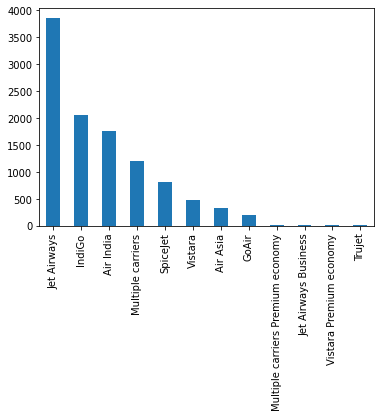

In [116]:
# JetAirways is mostly used.
df_train['Airline'].value_counts().plot(kind='bar')

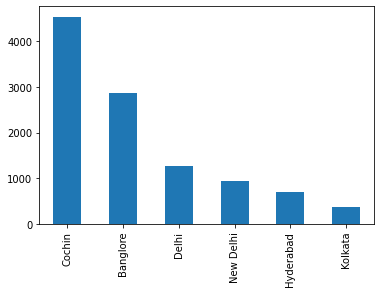

In [117]:
# Chochine is the most frequent Destination in datasets.
df_train['Destination'].value_counts().plot(kind='bar')

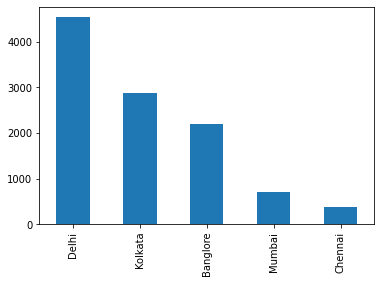

In [118]:
# Delhi is the most frequent source in data.
df_train['Source'].value_counts().plot(kind='bar')

In [119]:
# flights with stops 
flight_stops=pd.crosstab(df_train.Airline, df_train.Total_Stops, margins=True)
flight_stops

Total_Stops,1 stop,2 stops,3 stops,4 stops,non-stop,All
Airline,,,,,,
Air Asia,129,9,0,0,181,319
Air India,540,756,37,1,417,1751
GoAir,102,0,0,0,92,194
IndiGo,793,19,0,0,1241,2053
Jet Airways,2535,691,0,0,623,3849
Jet Airways Business,4,2,0,0,0,6
Multiple carriers,1145,43,8,0,0,1196
Multiple carriers Premium economy,13,0,0,0,0,13
SpiceJet,148,0,0,0,670,818


In [120]:
pd.crosstab(df_train.Duration,df_train.Airline, margins=True)

Airline,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,All
Duration,,,,,,,,,,,,,
10h,0,1,0,0,24,0,24,0,0,0,0,0,49
10h 10m,0,3,0,0,18,0,2,0,0,0,0,0,23
10h 15m,0,13,0,2,5,0,30,0,0,0,0,0,50
10h 20m,0,0,0,0,23,0,5,1,0,0,0,0,29
10h 25m,11,6,0,11,8,0,13,0,0,0,0,0,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9h 45m,0,0,0,0,20,0,8,0,0,0,0,0,28
9h 50m,2,9,0,0,51,0,2,0,0,0,0,0,64
9h 55m,0,0,0,0,0,0,2,0,0,0,0,0,2


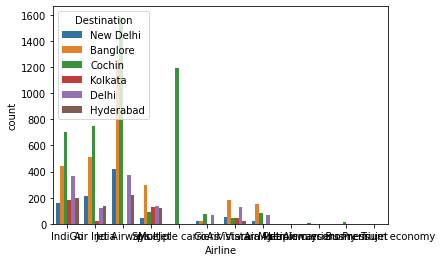

In [121]:
sns.countplot(x='Airline',hue='Destination',data=df_train)

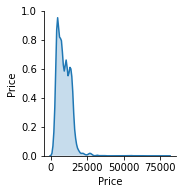

In [122]:
 sns.pairplot(df_train, diag_kind='kde', plot_kws={'alpha': 0.2})

In [124]:
df_train['Duration']=  df_train['Duration'].str.replace("h", '*60').str.replace(' ','+').str.replace('m','*1').apply(eval)
df_test['Duration']=  df_test['Duration'].str.replace("h", '*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

In [125]:
# changing train data into date time 
df_train["Dep_hour"] = pd.to_datetime(df_train["Dep_Time"]).dt.hour
df_train["Dep_min"] = pd.to_datetime(df_train["Dep_Time"]).dt.minute
df_train.drop(["Dep_Time"], axis = 1, inplace = True)
df_train["Arrival_hour"] = pd.to_datetime(df_train.Arrival_Time).dt.hour
df_train["Arrival_min"] = pd.to_datetime(df_train.Arrival_Time).dt.minute
df_train.drop(["Arrival_Time"], axis = 1, inplace = True)


In [126]:
# changing test datasets into datetime 
df_test["Journey_day"] = df_test['Date_of_Journey'].str.split('/').str[0].astype(int)
df_test["Journey_month"] = df_test['Date_of_Journey'].str.split('/').str[1].astype(int)
df_test.drop(["Date_of_Journey"], axis = 1, inplace = True)
df_test["Dep_hour"] = pd.to_datetime(df_test["Dep_Time"]).dt.hour
df_test["Dep_min"] = pd.to_datetime(df_test["Dep_Time"]).dt.minute
df_test.drop(["Dep_Time"], axis = 1, inplace = True)
df_test["Arrival_hour"] = pd.to_datetime(df_test.Arrival_Time).dt.hour
df_test["Arrival_min"] = pd.to_datetime(df_test.Arrival_Time).dt.minute
df_test.drop(["Arrival_Time"], axis = 1, inplace = True)

In [127]:
df_train["Additional_Info"] =df_train["Additional_Info"].replace({'No Info': 'No info'})
data = df_train.drop(["Price"], axis=1)

In [128]:
# 
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for column in df_train.columns:
    df_train[column] = labelencoder.fit_transform(df_train[column])

for column in df_test.columns:
    df_test[column] = labelencoder.fit_transform(df_test[column])


In [129]:
x=df_train
y=df_train['Price']

In [130]:
x,y

(       Airline  Date_of_Journey  Source  ...  Dep_min  Arrival_hour  Arrival_min
 0            3               24       0  ...        4             1            2
 1            1                6       3  ...       10            13            3
 2            4               43       2  ...        5             4            5
 3            3               10       3  ...        1            23            6
 4            3                0       0  ...       10            21            7
 ...        ...              ...     ...  ...      ...           ...          ...
 10678        0               41       3  ...       11            22            5
 10679        1               29       3  ...        9            23            4
 10680        4               29       0  ...        4            11            4
 10681       10                0       0  ...        6            14            2
 10682        1               42       2  ...       11            19            3
 
 [10682 rows x

In [131]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

from math import sqrt

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import KFold

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [132]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [133]:
print("The size of training input is", x_train.shape)
print("The size of training output is", y_train.shape)
print(50 *'*')
print("The size of testing input is", x_test.shape)
print("The size of testing output is", y_test.shape)


The size of training input is (7477, 13)
The size of training output is (7477,)
**************************************************
The size of testing input is (3205, 13)
The size of testing output is (3205,)


In [134]:
# Using GridSearchCV for the model
params ={'alpha' :[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
ridge_regressor =GridSearchCV(Ridge(), params ,cv =5,scoring = 'neg_mean_absolute_error', n_jobs =-1)
ridge_regressor.fit(x_train ,y_train)


GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                   10000, 100000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_absolute_error', verbose=0)

In [135]:
y_train_pred =ridge_regressor.predict(x_train)
y_test_pred =ridge_regressor.predict(x_test) 

In [136]:
print("Train Results for Ridge Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))

Train Results for Ridge Regressor Model:
--------------------------------------------------
Root mean squared error:  3.354748111997753e-11
Mean absolute % error:  inf
R-squared:  1.0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in true_divide


In [137]:
print("Test Results for Ridge Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_test, y_test_pred)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_test, y_test_pred)))
print("R-squared: ", r2_score(y_test, y_test_pred))

Test Results for Ridge Regressor Model:
--------------------------------------------------
Root mean squared error:  3.3225984557775176e-11
Mean absolute % error:  0.0
R-squared:  1.0


Using  LASSO Regressor in GridSearchcv


In [138]:
params ={'alpha' :[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
lasso_regressor =GridSearchCV(Lasso(), params ,cv =15,scoring = 'neg_mean_absolute_error', n_jobs =-1)
lasso_regressor.fit(x_train ,y_train)

GridSearchCV(cv=15, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                   10000, 100000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_absolute_error', verbose=0)

In [139]:
y_train_pred =lasso_regressor.predict(x_train) 
y_test_pred =lasso_regressor.predict(x_test) 

In [140]:
print("Train Results for Lasso Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))

Train Results for Lasso Regressor Model:
--------------------------------------------------
Root mean squared error:  6.493362183552897e-05
Mean absolute % error:  inf
R-squared:  0.999999999999987


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in true_divide


In [141]:
print("Test Results for Lasso Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_test, y_test_pred)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_test, y_test_pred)))
print("R-squared: ", r2_score(y_test, y_test_pred))

Test Results for Lasso Regressor Model:
--------------------------------------------------
Root mean squared error:  6.446015723288324e-05
Mean absolute % error:  0.0
R-squared:  0.9999999999999872


Using KNN Regressor 

In [142]:
k_range = list(range(1, 30))
params = dict(n_neighbors = k_range)
knn_regressor = GridSearchCV(KNeighborsRegressor(), params, cv =10, scoring = 'neg_mean_squared_error')
knn_regressor.fit(x_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [143]:
y_train_pred =knn_regressor.predict(x_train) 
y_test_pred =knn_regressor.predict(x_test) 

In [144]:
print("Train Results for KNN Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))

Train Results for KNN Regressor Model:
--------------------------------------------------
Root mean squared error:  3.6070573800057257
Mean absolute % error:  inf
R-squared:  0.999959774661019


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in true_divide


In [145]:
print("Test Results for KNN Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_test, y_test_pred)))
print("Mean absolute % errorr: ", round(mean_absolute_percentage_error(y_test, y_test_pred)))
print("R-squared: ", r2_score(y_test, y_test_pred))

Test Results for KNN Regressor Model:
--------------------------------------------------
Root mean squared error:  5.1959455906206236
Mean absolute % errorr:  1.0
R-squared:  0.9999167228017489


Using DecisionTreeRegressor 

In [146]:
depth  =list(range(3,30))
param_grid =dict(max_depth =depth)
D_tree =GridSearchCV(DecisionTreeRegressor(),param_grid,cv =10)
D_tree.fit(x_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                       15, 16, 17, 18, 19, 20, 21, 22, 23,

In [147]:
y_train_pred =D_tree.predict(x_train)
y_test_pred =D_tree.predict(x_test) 

In [148]:
print("Train Results for Decision Tree Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))

Train Results for Decision Tree Regressor Model:
--------------------------------------------------
Root mean squared error:  0.0
Mean absolute % error:  nan
R-squared:  1.0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


In [149]:
print("Test Results for Decision Tree Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_test, y_test_pred)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_test, y_test_pred)))
print("R-squared: ", r2_score(y_test, y_test_pred))

Test Results for Decision Tree Regressor Model:
--------------------------------------------------
Root mean squared error:  0.7036787665918747
Mean absolute % error:  0.0
R-squared:  0.9999984726245387


Using RandomizesearchCV 

In [150]:
tuned_params = {'n_estimators': [100, 200, 300, 400, 500], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
random_regressor = RandomizedSearchCV(RandomForestRegressor(), tuned_params, n_iter = 20, scoring = 'neg_mean_absolute_error', cv = 5, n_jobs = -1)
random_regressor.fit(x_train, y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [151]:
y_train_pred = random_regressor.predict(x_train)
y_test_pred = random_regressor.predict(x_test)

In [152]:
print("Train Results for Random Forest Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))

Train Results for Random Forest Regressor Model:
--------------------------------------------------
Root mean squared error:  0.14743106916502585
Mean absolute % error:  inf
R-squared:  0.9999999327996336


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in true_divide


In [153]:
print("Test Results for Random Forest Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_test, y_test_pred)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_test, y_test_pred)))
print("R-squared: ", r2_score(y_test, y_test_pred))

Test Results for Random Forest Regressor Model:
--------------------------------------------------
Root mean squared error:  0.4043170605990053
Mean absolute % error:  0.0
R-squared:  0.9999994957556385


Using XGBoosting in RandomizeSearchcv


In [154]:
tuned_params = {'max_depth': [1, 2, 3, 4, 5], 'learning_rate': [0.01, 0.05, 0.1], 'n_estimators': [100, 200, 300, 400, 500], 'reg_lambda': [0.001, 0.1, 1.0, 10.0, 100.0]}
XGB = RandomizedSearchCV(XGBRegressor(), tuned_params, n_iter=20, scoring = 'neg_mean_absolute_error', cv=5, n_jobs=-1)
XGB.fit(x_train, y_train)

[14:30:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_state=0, reg_alpha=...
                                          seed=None, silent=None, subsample=1,
                                          verbosity=1),
                   iid='deprecated', n_iter=20, n_job

In [155]:
y_train_pred = XGB.predict(x_train)
y_test_pred = XGB.predict(x_test)

In [156]:
print("Train Results for XGBoost Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))

Train Results for XGBoost Regressor Model:
--------------------------------------------------
Root mean squared error:  0.537583750887255
Mean absolute % error:  inf
R-squared:  0.9999991065178575


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in true_divide


In [157]:
print("Test Results for XGBoost Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_test, y_test_pred)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_test, y_test_pred)))
print("R-squared: ", r2_score(y_test, y_test_pred))

Test Results for XGBoost Regressor Model:
--------------------------------------------------
Root mean squared error:  0.721676609604359
Mean absolute % error:  0.0
R-squared:  0.9999983934946539


 DescisionTree Regressor Model giving perform better  in both test and train data.

In [158]:
from sklearn.externals import joblib
joblib.dump(D_tree,'PROJECT13_MODEL1.csv')
model1=joblib.load('PROJECT13_MODEL1.csv')
model1.predict(x_test)

array([1710.,  185.,  918., ...,  192.,   17.,  492.])